<a href="https://colab.research.google.com/github/EAakiyama3104/python_lecture/blob/master/%5BPython%E8%AC%9B%E5%BA%A7%5D%E7%AC%AC2%E5%9B%9ECSV%E3%83%95%E3%82%A1%E3%82%A4%E3%83%AB%E3%81%AE%E3%83%87%E3%83%BC%E3%82%BF%E3%82%92%E5%8F%AF%E8%A6%96%E5%8C%96%E3%81%99%E3%82%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 今回学ぶこと

* CSV データをPythonプログラムに読み込む方法
* Pandas を用いてデータをを扱う方法
* Seaborn でデータを描画する方法



## Pandasについて

Pandas とは

* Pythonにおいて、データ解析を支援する機能を提供するライブラリ
* データ操作を行うための DataFrame クラスを持つ。DataFrame内のデータをデータベースのように扱える。
* CSVなど、様々なデータを簡単に読み込める



In [ ]:
import pandas as pd

## Python の可視化ライブラリ

matplotlib について

* Python でグラフを描くためのライブラリ


seaborn について

* matplotlib のグラフを簡単にきれいに描画できるライブラリ

例: https://seaborn.pydata.org/examples/index.html

この講座ではseabornを使ってグラフを描画します

In [ ]:
import seaborn as sns

# グラフのデザインを指定
sns.set(style="whitegrid")

# ライブラリの中に含まれているサンプルデータセットを読み込み
titanic = sns.load_dataset("titanic")

In [ ]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


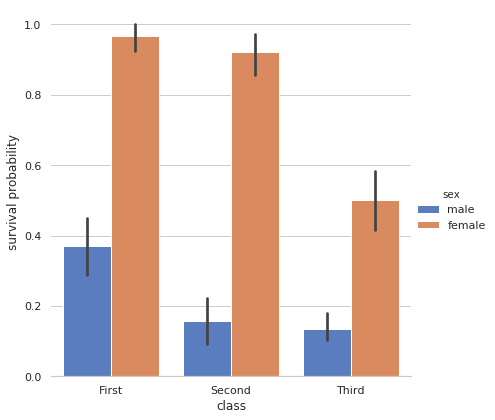

In [ ]:
# 棒グラフを描画
g = sns.catplot(x="class", y="survived", hue="sex", data=titanic,
                height=6, kind="bar", palette="muted")
# 軸を除去
g.despine(left=True)
# y軸のラベルに名前を付ける
g.set_ylabels("survival probability")

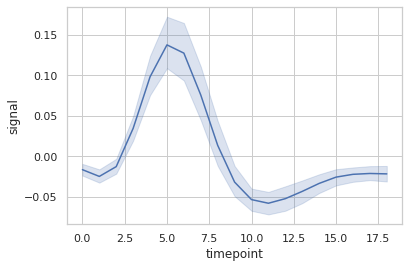

In [ ]:
# サンプルデータを読み込み
fmri = sns.load_dataset("fmri")
# 折れ線グラフを描画
sns.lineplot(x="timepoint", y="signal", data=fmri)

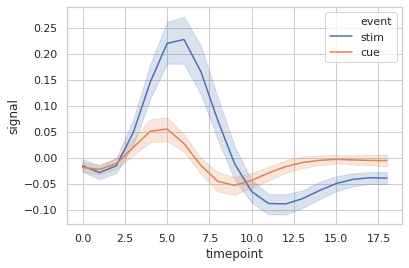

In [ ]:
# event 毎の折れ線グラフを描画
sns.lineplot(x="timepoint", y="signal", hue="event", data=fmri)

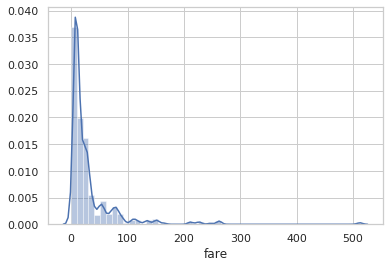

In [ ]:
# ヒストグラムを描画
sns.distplot(titanic['fare'])

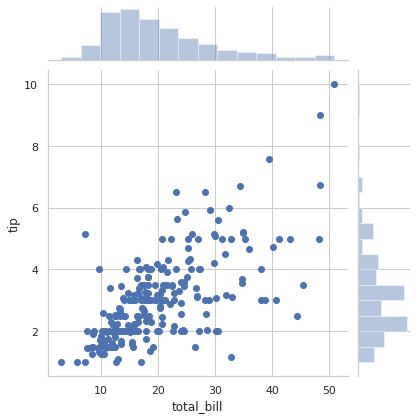

In [ ]:
# サンプルデータを読み込み
tips = sns.load_dataset("tips")
# 散布図を描画
g = sns.jointplot(x="total_bill", y="tip", data=tips)

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## フェスデータを可視化する

バンド名が長くなっていることを確認

以下のスプレッドシートを利用します

https://docs.google.com/spreadsheets/d/1F08nnk8gm7GG0oL1mshxMFPQICK5yor9pYcVRGbPGas/edit#gid=0

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
# グラフ描画の設定
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.set_context("notebook")
# sns.set(font='IPAGothic')

In [ ]:
master_df = pd.read_csv("fes_data.csv")

In [ ]:
master_df

,year,fes_title,place,stage,artist_name
0,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,MONGOL800
1,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,GLIM SPANKY
2,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,"ROUTE 17 Rock'n'Roll ORCHESTRA (feat. 仲井戸""CHAB..."
3,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,YEARS & YEARS
4,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,サカナクション
...,...,...,...,...,...
9996,2018,ROCK IN JAPAN FES,茨城県,WING TENT,fhána
9997,2018,ROCK IN JAPAN FES,茨城県,WING TENT,BACK LIFT
9998,2018,ROCK IN JAPAN FES,茨城県,WING TENT,ユアネス
9999,2018,ROCK IN JAPAN FES,茨城県,WING TENT,POT


In [ ]:
# 最初の行のみを表示
master_df.head(3)

,year,fes_title,place,stage,artist_name
0,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,MONGOL800
1,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,GLIM SPANKY
2,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,"ROUTE 17 Rock'n'Roll ORCHESTRA (feat. 仲井戸""CHAB..."


In [ ]:
master_df.head()

,year,fes_title,place,stage,artist_name
0,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,MONGOL800
1,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,GLIM SPANKY
2,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,"ROUTE 17 Rock'n'Roll ORCHESTRA (feat. 仲井戸""CHAB..."
3,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,YEARS & YEARS
4,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,サカナクション


In [ ]:
# 特定の列のみ抽出
master_df[['year', 'artist_name']].head()

,year,artist_name
0,2018,MONGOL800
1,2018,GLIM SPANKY
2,2018,"ROUTE 17 Rock'n'Roll ORCHESTRA (feat. 仲井戸""CHAB..."
3,2018,YEARS & YEARS
4,2018,サカナクション


アーティスト名の長さをカラムに追加

In [ ]:
# artist_name カラムを明示的にstrに型変換
master_df["artist_name"] = master_df["artist_name"].astype(str)

In [ ]:
# artist_name カラムの要素に1つずつ、len() メソッドを適用し、アーティスト名の長さを取得
master_df["name_length"] = master_df["artist_name"].map(len)

In [ ]:
master_df.head()

,year,fes_title,place,stage,artist_name,name_length
0,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,MONGOL800,9
1,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,GLIM SPANKY,11
2,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,"ROUTE 17 Rock'n'Roll ORCHESTRA (feat. 仲井戸""CHAB...",69
3,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,YEARS & YEARS,13
4,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,サカナクション,7


In [ ]:
# 長さが30以上のアーティストのみ抽出
master_df[master_df['name_length'] >= 30]

,year,fes_title,place,stage,artist_name,name_length
2,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,"ROUTE 17 Rock'n'Roll ORCHESTRA (feat. 仲井戸""CHAB...",69
6,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,SPECIAL GUEST:G&G Miller Orchestra,34
15,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,ANDERSON .PAAK & THE FREE NATIONALS,35
74,2018,FUJI ROCK FESTIVAL,新潟県,RED MARQUEE,CHAI (selected by ROOKIE A GO-GO),33
77,2018,FUJI ROCK FESTIVAL,新潟県,FIELD OF HEAVEN,GOMA & The Jungle Rhythm Section,32
...,...,...,...,...,...,...
9455,2015,ROCK IN JAPAN FES,茨城県,LAKE STAGE,"Fear, and Loathing in Las Vegas",31
9528,2015,ROCK IN JAPAN FES,茨城県,sound of forest,OVERGROUND ACOUSTIC UNDERGROUND,31
9656,2016,ROCK IN JAPAN FES,茨城県,sound of forest,OVERGROUND ACOUSTIC UNDERGROUND,31
9799,2017,ROCK IN JAPAN FES,茨城県,sound of forest,OVERGROUND ACOUSTIC UNDERGROUND,31


In [ ]:
# 長い順にソート
master_df.sort_values(by='name_length', ascending=False).head()

,year,fes_title,place,stage,artist_name,name_length
7890,2016,RISING SUN ROCK FES,北海道,SUN STAGE,【増子直純（怒髪天）、友森昭一、大槻ケンヂ（筋肉少女帯、特撮）、福島忍（勝手にしやがれ）、中...,256
4973,2015,SUMMER SONIC,東京都,ISLAND STAGE,SORRY YOUTH (from Taiwan) FLESH JUICER (from ...,222
8156,2018,RISING SUN ROCK FES,北海道,def garage,怒髪天×RSR FRIDAY NIGHT SESSION “TRIBUTE TO blood...,187
7659,2014,RISING SUN ROCK FES,北海道,EARTH TENT,"【OKAMOTO'S, 斎藤有太, 吾妻光良, 奥田民生, 仲井戸""CHABO""麗市, 中村...",179
7021,2007,RISING SUN ROCK FES,北海道,GREEN OASIS,"POPGROUP""KAIKOO"" @RISING SUN ROCK FESTIVAL 200...",178


In [ ]:
master_df.sort_values(by='name_length', ascending=True).head()

,year,fes_title,place,stage,artist_name,name_length
8783,2009,ROCK IN JAPAN FES,茨城県,sound of forest,鶴,1
8896,2010,ROCK IN JAPAN FES,茨城県,PARK STAGE,J,1
9250,2013,ROCK IN JAPAN FES,茨城県,WING TENT,J,1
6394,2009,SUMMER SONIC,東京都,GARDENSTAGE,鶴,1
4056,2001,FUJI ROCK FESTIVAL,新潟県,Midnight M-stage music ROOKIE A GO-GO,界,1


In [ ]:
# 欠損値を確認
master_df.isnull()

,year,fes_title,place,stage,artist_name,name_length
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
9996,False,False,False,False,False,False
9997,False,False,False,False,False,False
9998,False,False,False,False,False,False
9999,False,False,False,False,False,False


In [ ]:
master_df.isnull().sum()

year            0
fes_title       0
place           0
stage          14
artist_name     0
name_length     0
dtype: int64

In [ ]:
# 欠損値(null)を置換
master_df.fillna(value={'stage': ''}, inplace=True)
master_df.isnull().sum()

year           0
fes_title      0
place          0
stage          0
artist_name    0
name_length    0
dtype: int64

In [ ]:
# 欠損値がある行を削除
master_df.dropna(inplace=True)
master_df.isnull().sum()

year           0
fes_title      0
place          0
stage          0
artist_name    0
name_length    0
dtype: int64

2018,'stage 1', 0001

2019,'',0002

In [ ]:
master_df.head()

,year,fes_title,place,stage,artist_name,name_length
0,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,MONGOL800,9
1,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,GLIM SPANKY,11
2,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,"ROUTE 17 Rock'n'Roll ORCHESTRA (feat. 仲井戸""CHAB...",69
3,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,YEARS & YEARS,13
4,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,サカナクション,7


FUJI ROCK FESTIVAL のみ抽出

In [ ]:
fuji_rock = master_df[master_df["fes_title"] == "FUJI ROCK FESTIVAL"]

In [ ]:
fuji_rock

,year,fes_title,place,stage,artist_name,name_length
0,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,MONGOL800,9
1,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,GLIM SPANKY,11
2,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,"ROUTE 17 Rock'n'Roll ORCHESTRA (feat. 仲井戸""CHAB...",69
3,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,YEARS & YEARS,13
4,2018,FUJI ROCK FESTIVAL,新潟県,GREEN STAGE,サカナクション,7
...,...,...,...,...,...,...
4378,1997,FUJI ROCK FESTIVAL,山梨県,SECOND STAGE,audio active,12
4379,1997,FUJI ROCK FESTIVAL,山梨県,SECOND STAGE,MAD PROFESSOR,13
4380,1997,FUJI ROCK FESTIVAL,山梨県,SECOND STAGE,SQUAREPUSHER,12
4381,1997,FUJI ROCK FESTIVAL,山梨県,SECOND STAGE,"Lee ""scratch"" Parry",19


In [ ]:
fuji_rock.head(5)

年毎のアーティスト名の長さの平均を求める手順

1. DataFrameの全データを年毎に分割して、グループを作成 (Splitting)
2. グループ毎に平均値を求める (Applying)
3. それぞれのグループを合わせた新しいDataFrameを作成 (Combining)



![年毎の平均値を求める](http://drive.google.com/uc?export=view&id=1jWuNslF69Rd2dYjJfN1LkzELnOJ0k8js)


公式ドキュメント

https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html


In [ ]:
# 年ごとにデータを分割
fuji_rock_groupby_year = fuji_rock.groupby('year')

In [ ]:
# 年ごとの平均値を算出、データを合成
fuji_rock_groupby_year.mean()

,name_length
year,
1997,13.593750
1998,13.121212
1999,15.000000
2000,12.837209
2001,11.118110
2002,12.041985
2003,12.819767
2004,12.462766
2005,13.728155


In [ ]:
# describe() を用いると様々な統計データを表示できる
fuji_rock_groupby_year.describe()

name_length                                                    
           count       mean        std  min   25%   50%    75%   max
year                                                                
1997        32.0  13.593750   7.237266  4.0  6.75  13.0  18.25  29.0
1998        33.0  13.121212   7.448815  4.0  7.00  12.0  19.00  31.0
1999       116.0  15.000000  10.322622  2.0  8.00  13.0  18.00  56.0
2000       129.0  12.837209   7.660563  2.0  8.00  11.0  16.00  42.0
2001       127.0  11.118110   6.271141  1.0  7.00  11.0  13.50  45.0
2002       262.0  12.041985   7.191027  1.0  7.00  11.0  14.00  50.0
2003       172.0  12.819767   8.677932  2.0  7.00  11.0  18.25  60.0
2004       188.0  12.462766   9.805253  1.0  6.00  11.0  15.00  64.0
2005       206.0  13.728155   9.253813  2.0  7.00  11.0  18.00  49.0
2006       226.0  13.451327   8.821178  2.0  7.00  11.0  17.00  45.0
2007       223.0  13.672646   8.802411  2.0  8.00  12.0  18.00  47.0
2008       226.0  14.190265  10.105844  2.0  8.00  12.0  19.00  74.0
2009       238.0  13.588235   9.364095  2.0  7.00  11.0  17.75  60.0
2010       236.0  15.644068  11.272656  3.0  8.00  13.0  19.25  60.0
2011       239.0  13.690377   9.207023  2.0  7.00  11.0  18.00  47.0
2012       255.0  14.788235  12.031874  1.0  7.00  11.0  18.00  98.0
2013       262.0  16.206107  12.648940  2.0  8.00  13.0  20.00  95.0
2014       246.0  15.934959  11.621402  2.0  8.00  13.0  18.75  75.0
2015       203.0  13.960591  11.461447  1.0  7.00  10.0  17.50  75.0
2016       236.0  14.673729  12.047402  2.0  7.00  12.0  18.00  91.0
2017       246.0  13.548780  10.545705  3.0  7.00  10.0  17.00  76.0
2018       282.0  14.340426  11.049761  2.0  8.00  12.0  16.75  90.0

平均値を棒グラフで表示する際は、barplot を使用


https://seaborn.pydata.org/generated/seaborn.barplot.html

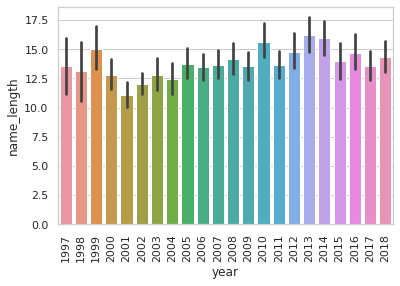

In [ ]:
# 年ごとのアーティスト名の長さの平均値をグラフで表示
chart = sns.barplot(x="year", y="name_length", data=fuji_rock)
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=90) # x軸のラベルを縦に表示
# 年の下二桁だけ表示できるか。5年ごとに年を表示できるか。

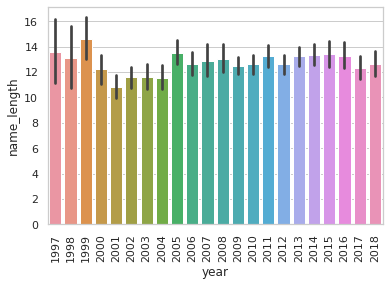

In [ ]:
# 年ごとのアーティスト名の長さの平均値をグラフで表示(全フェス)
chart = sns.barplot(x="year", y="name_length", data=master_df)
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=90) # x軸のラベルを縦に表示

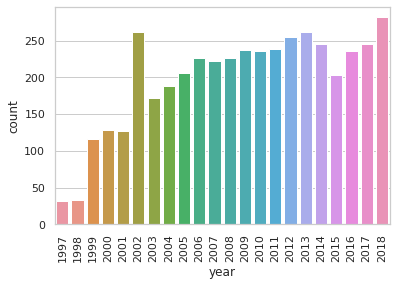

In [ ]:
# 年ごとの出演バンド数
chart = sns.countplot(x="year", data=fuji_rock)
_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=90) # x軸のラベルを縦に表示